## Privkit: A Toolkit of Privacy-Preserving Mechanisms for Heterogeneous Data Types

This Jupyter Notebook presents the use cases demonstrated in the paper "Privkit: A Toolkit of Privacy-Preserving Mechanisms for Heterogeneous Data Types".

## Abstract

With the massive data collection from different devices, spanning from mobile devices to all sorts of IoT devices, protecting the privacy of users is a fundamental concern. In order to prevent unwanted disclosures, several Privacy-Preserving Mechanisms (PPMs) have been proposed. Nevertheless, due to the lack of a standardized and universal privacy definition, configuring and evaluating PPMs is quite challenging, requiring knowledge that the average user does not have. In this paper, we propose a privacy toolkit - Privkit - to systematize this process and facilitate automated configuration of PPMs. Privkit enables the assessment of privacy-preserving mechanisms with different configurations, while allowing the quantification of the achieved privacy and utility level of various types of data. Privkit is open source and can be extended with new data types, corresponding PPMs, as well as privacy and utility assessment metrics and privacy attacks over such data. This toolkit is available through a Python Package with several state-of-the-art PPMs already implemented, and also accessible through a Web application. Privkit constitutes a unified toolkit that makes the dissemination of new privacy-preserving methods easier and also facilitates reproducibility of research results, through a repository of Jupyter Notebooks that enable reproduction of research results.

## Citation

Please consider to cite our publication in your scientific work:

```
@inproceedings{10.1145/3626232.3653284,
    author = {Cunha, Mariana and Duarte, Guilherme and Andrade, Ricardo and Mendes, Ricardo and Vilela, Jo\~{a}o P.},
    title = {Privkit: A Toolkit of Privacy-Preserving Mechanisms for Heterogeneous Data Types},
    year = {2024},
    isbn = {9798400704215},
    publisher = {Association for Computing Machinery},
    address = {New York, NY, USA},
    url = {https://doi.org/10.1145/3626232.3653284},
    doi = {10.1145/3626232.3653284},
    booktitle = {Proceedings of the Fourteenth ACM Conference on Data and Application Security and Privacy},
    pages = {319–324},
    numpages = {6},
    location = {<conf-loc>, <city>Porto</city>, <country>Portugal</country>, </conf-loc>},
    series = {CODASPY '24}
}
```

----------

## Import Privkit

In [3]:
import privkit as pk

#### Use Case 1: Location Data

Example of loading data from an array:

In [4]:
data_to_load = [['2008-10-23 02:53:04', 39.984702, 116.318417],
                ['2008-10-23 02:53:10', 39.984683, 116.31845],
                ['2008-10-23 02:53:15', 39.984686, 116.318417]]

location_data = pk.LocationData()
location_data.load_data(data_to_load, datetime=0, latitude=1, longitude=2)
display(location_data.data)

,datetime,lat,lon,uid,tid,original_lat,original_lon
0,2008-10-23 02:53:04,39.984702,116.318417,1,1,39.984702,116.318417
1,2008-10-23 02:53:10,39.984683,116.318450,1,1,39.984683,116.318450
2,2008-10-23 02:53:15,39.984686,116.318417,1,1,39.984686,116.318417


Example of loading the Geolife dataset, available in Privkit:

In [5]:
geolife_dataset = pk.datasets.GeolifeDataset()
geolife_dataset.load_dataset()

Loading the geolife dataset
Dataset loaded from ./input/data/geolife.pkl


Selecting the first 50 elements of Geolife dataset and then apply PPMs (Planar Laplace and Clustergin Geo-Ind) and attacks (Map-Matching and optimalHW):

In [6]:
location_data = geolife_dataset.data
location_data.data = location_data.data[:50]

Applying PPMs (Planar Laplace and Clustering Geo-Ind):

In [7]:
planar_laplace = pk.ppms.PlanarLaplace(epsilon=0.016)
obfuscated_data_pl = planar_laplace.execute(location_data)
obfuscated_data_pl.data = location_data.data.copy()

In [8]:
clustering = pk.ppms.ClusteringGeoInd(epsilon=0.016, r=100)
obfuscated_data_cgi = clustering.execute(location_data)
obfuscated_data_cgi.data = location_data.data.copy()

Example of applying MM to data obfuscated with Planar Laplace:

In [9]:
#import osmnx as ox

#G = ox.graph_from_point((location_data.data['lat'].mean(), location_data.data['lon'].mean()), dist=2500, retain_all=False, truncate_by_edge=True)

#map_matching = pk.attacks.MapMatching(G=road_network)
#map_matching.execute(obfuscated_data_pl)

Example of applying the optimal attack to data obfuscated with Planar Laplace and Clustering Geo-ind, with corresponding quality loss and adversary error metrics:

In [10]:
results = {
    planar_laplace.PPM_ID: obfuscated_data_pl, 
    clustering.PPM_ID: obfuscated_data_cgi
}

for ppm, data in results.items():    
    print(f"Applying optHW for {ppm}:")
    
    optHW = pk.OptimalHW(epsilon=0.016)
    location_data_opthw = optHW.execute(data)
    
    adversary_error = pk.metrics.AdversaryError()
    adversary_error.execute(data)

    quality_loss = pk.metrics.QualityLoss()
    quality_loss.execute(data)
    print("--------------------------")
    

Applying optHW for planar_laplace:
Creating a grid from locations with 250m squared cells.
Computing the locationstamp and timestamp for an interval of 60s
Dividing data into train and test data with a 0.2 ratio for testing.
Statistics of Adversary Error:

Median: 57.3041659374729

Mean: 60.18707809250688

Statistics of Quality Loss:

Median: 45.731155809297775

Mean: 52.78825942394996

--------------------------
Applying optHW for clustering_geo_ind:
Statistics of Adversary Error:

Median: 57.3041659374729

Mean: 60.18707809250688

Statistics of Quality Loss:

Median: 45.731155809297775

Mean: 52.78825942394996

--------------------------


**Results**

In [11]:
import matplotlib.pyplot as plt

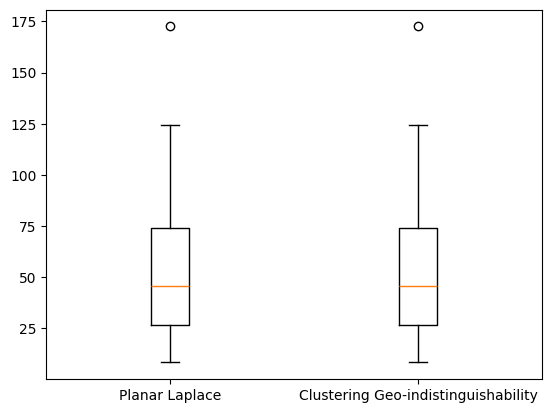

In [12]:
fig, ax = plt.subplots()
ax.boxplot([obfuscated_data_pl.data[quality_loss.METRIC_ID], obfuscated_data_cgi.data[quality_loss.METRIC_ID]])
ax.set_xticklabels([planar_laplace.PPM_NAME, clustering.PPM_NAME])

plt.show()

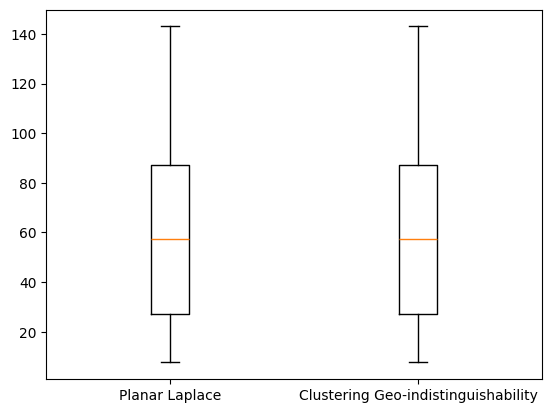

In [13]:
fig, ax = plt.subplots()
ax.boxplot([obfuscated_data_pl.data[adversary_error.METRIC_ID], obfuscated_data_cgi.data[adversary_error.METRIC_ID]])
ax.set_xticklabels([planar_laplace.PPM_NAME, clustering.PPM_NAME])

plt.show()

#### Use Case 2: Facial Data

To execute the facial data use case, you should first have a .ply file and then change the path in `data_to_load`.

In [14]:
data_to_load = 'sample_face.ply'  # TODO you should add a .ply file here

facial_data = pk.FacialData()
facial_data.load_data(data_to_load)

In [15]:
point_mesh_point = pk.ppms.PointMeshPoint(alpha=40, n=200000)
obfuscated_data_PMP = point_mesh_point.execute(facial_data)